# Universidad Nacional de Colombia
## Algoritmos - Grupo 2
## Proyecto Final


In [2]:
!pip3 install networkx
!pip3 install pyproj
!pip3 install anytree

     |████████████████████████████████| 6.3 MB 21.1 MB/s 
     |████████████████████████████████| 41 kB 451 kB/s 


1. Construir la matriz de adyacencia, usando la tabla de distancias entre ciudades de [Mejores Rutas](https://co.mejoresrutas.com/tabla-de-distancias-entre-ciudades/co.csv?measure=time&type=road)

In [3]:
import pandas as pd
import numpy as np

ROUTES_URL = 'https://co.mejoresrutas.com/tabla-de-distancias-entre-ciudades/co.csv?measure=time&type=road'

df = pd.read_csv(ROUTES_URL)

adjacency_matrix = df \
    .iloc[0:-3] \
    .drop(labels=df.columns[0], axis=1) \
    .fillna(0)

for column in adjacency_matrix.columns:
    adjacency_matrix[column] = adjacency_matrix[column].str.split(':')
    adjacency_matrix[column] = adjacency_matrix[column].fillna(0)
    adjacency_matrix[column] = adjacency_matrix[column].apply(lambda x : int(x[0]) * 60 + int(x[1]) if x != 0 else 0)

adjacency_matrix = adjacency_matrix.to_numpy()


2. Una vez construida la matríz, es posible usarla para construir el grafo, usando la librería [networkX](https://networkx.org/)

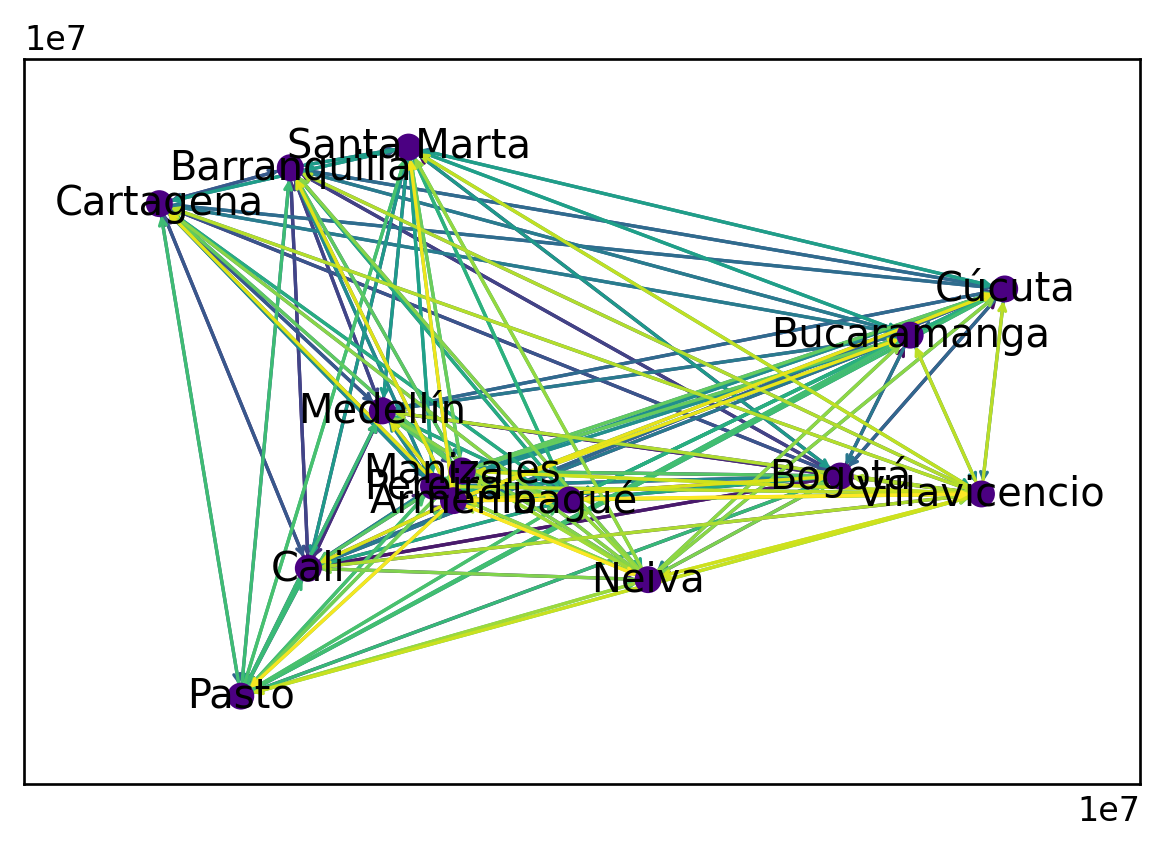

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from pyproj import Transformer

mpl.rcParams['figure.dpi'] = 240


G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.MultiDiGraph)
cities_dict = dict([ (k, x) for k, x in enumerate(df.columns[1:]) ])
G = nx.relabel.relabel_nodes(G, cities_dict)

node_sizes = [ 50 for _ in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

# EPSG-codes:
# 4326: https://epsg.io/4326 World Geodetic System 1984, used in GPS
# 4530: https://epsg.io/6501 Cartesian 2D coordinate system
trans_GPS_to_XY = Transformer.from_crs(4326, 6501)

pos = dict(zip(df.columns[1:], map(lambda cds: trans_GPS_to_XY.transform(cds[1], cds[0]), [
    (-74.081666,  4.609722), # Bogota
    (-76.522500,  3.437222), # Cali
    (-75.563611,  6.251944), # Medellin
    (-74.796388, 10.963888), # Barranquilla
    (-75.514444, 10.399722), # Cartagena
    (-72.505277,  7.883333), # Cucuta
    (-73.119722,  7.125278), # Bucaramanga
    (-75.696111,  4.813333), # Pereira
    (-74.199167, 11.240833), # Santa Marta
    (-75.232222,  4.438889), # Ibague
    (-77.281111,  1.213611), # Pasto
    (-75.517500,  5.068889), # Manizales
    (-75.281944,  2.927222), # Neiva
    (-73.626667,  4.141944), # Villavicencio
    (-75.681111,  4.533889)  # Armenia
])))

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=5,
    edge_color=edge_colors,
    width=1,
)
labels = nx.draw_networkx_labels(G, pos)

plt.margins(0.1)

Asignando propiedades a cada nodo

In [5]:

"""test="Bogotá"
openSet[test]=G.nodes[test]["x"]
openSet[test]=G.nodes[test]["y"]
if test in openSet:
  print(openSet.popitem())
G.nodes["Cali"]["x"]
clear(self) – D.clear() -> None. Remove all items from D.
peekitem(self) – D.peekitem() -> (k, v), return the (key, value) pair with lowest value; but raise KeyError if D is empty.
popitem(self) – D.popitem() -> (k, v), remove and return the (key, value) pair with lowest value; but raise KeyError if D is empty.
get(self, key, default=None) – D.get(k[, d]) -> D[k] if k in D, else d. d defaults to None.
items(self) – D.items() -> a set-like object providing a view on D’s items
keys(self) – D.keys() -> a set-like object providing a view on D’s keys
values(self) – D.values() -> an object providing a view on D’s values
"""


'test="Bogotá"\nopenSet[test]=G.nodes[test]["x"]\nopenSet[test]=G.nodes[test]["y"]\nif test in openSet:\n  print(openSet.popitem())\nG.nodes["Cali"]["x"]\nclear(self) – D.clear() -> None. Remove all items from D.\npeekitem(self) – D.peekitem() -> (k, v), return the (key, value) pair with lowest value; but raise KeyError if D is empty.\npopitem(self) – D.popitem() -> (k, v), remove and return the (key, value) pair with lowest value; but raise KeyError if D is empty.\nget(self, key, default=None) – D.get(k[, d]) -> D[k] if k in D, else d. d defaults to None.\nitems(self) – D.items() -> a set-like object providing a view on D’s items\nkeys(self) – D.keys() -> a set-like object providing a view on D’s keys\nvalues(self) – D.values() -> an object providing a view on D’s values\n'

A*

In [13]:
import time
from anytree import Node, RenderTree
from networkx.classes.function import get_node_attributes, set_node_attributes
import heapdict #minheap para openset
attrs = {"Bogotá": {"x": -74.081666, "y": 4.609722, "f":0, "g":0, "h":0,"prev":"Na"},
         "Cali": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Medellín": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Barranquilla": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Cartagena": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Cúcuta": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Bucaramanga": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Pereira": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Santa Marta": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Ibagué": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Pasto": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Manizales": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Neiva": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Villavicencio": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"},
         "Armenia": {"x": -76.522500, "y": 3.437222, "f":0, "g":0, "h":0,"prev":"Na"}
         }
set_node_attributes(G,attrs)

def heuristic(city1,city2): #heuristica, distancia entre 2 nodos
  return np.sqrt(((G.nodes[city2]["x"]-G.nodes[city1]["x"])**2)-((G.nodes[city2]["y"]-G.nodes[city1]["y"])**2))

def ftotal(city): #f=g+h
  return G.nodes[city]["g"]+G.nodes[city]["h"]
  #return G.nodes[city]["g"]

def gtotal(city1,city2):
  n=G.get_edge_data(city1,city2)
  return G.nodes[city1]["g"]+n[0]["weight"]

def oSempty():
  if len(list(openSet.keys()))>0:
    return False
  else:
    return True

inicio = time.time()
openSet=heapdict.heapdict()
closedSet={}
Origen="Cali"
Destino="Bucaramanga"
set_node_attributes(G,{Origen:{"h":heuristic(Origen,Destino)}})
set_node_attributes(G,{Origen:{"f":ftotal(Origen)}})
openSet.clear()
openSet[Origen]=G.nodes[Origen]["f"] #se añade el nodo origen al openset
root=Node(Origen)
dicNodos={Origen:root}
while not oSempty():  

  current=openSet.popitem()    
  closedSet[current[0]]=current[1] 
   
  if current[0]==Destino:    
    print(dicNodos[current[0]])
    print("acabamos")
    break
  else:
    for i in list(G.adj[current[0]]):
           
      if i in closedSet:
           continue                       
      if i in list(openSet.keys()):                         
        if gtotal(current[0],i)<G.nodes[i]["g"]:
          dicNodos2={i:Node(i, parent=dicNodos[current[0]])}
          dicNodos.update(dicNodos2)         
          set_node_attributes(G,{i:{"prev":current[0]}})
          set_node_attributes(G,{i:{"g":gtotal(current[0],i)}})
          set_node_attributes(G,{i:{"f":ftotal(i)}})
          
      
      else:        
        dicNodos[i]=Node(i, parent=dicNodos[current[0]])               
        set_node_attributes(G,{i:{"prev":current[0]}})
        set_node_attributes(G,{i:{"h":heuristic(i,Destino)}})
        set_node_attributes(G,{i:{"g":gtotal(current[0],i)}})
        set_node_attributes(G,{i:{"f":ftotal(i)}})        
      openSet[i]=G.nodes[i]["f"]
  
fin = time.time() 
print(fin-inicio)
  

     


Node('/Cali/Bucaramanga')
acabamos
0.0035674571990966797


In [10]:
inicio = time.time()
print(nx.dijkstra_path(G,"Cali","Bucaramanga"))
fin = time.time() 
print(fin-inicio)

['Cali', 'Bucaramanga']
0.002890348434448242


In [12]:
inicio = time.time()
print(nx.astar_path(G,"Cali","Bucaramanga"))
fin = time.time() 
print(fin-inicio)

['Cali', 'Bucaramanga']
0.003080606460571289



Complejidad temporal
-------------------------

    while not oSempty(): O(n)

      Bloque de instrucciones

      for i in list(G.adj[current[0]]): O(m)
          Bloque de instrucciones
     
  
A simple vista parece un O(m^n), sin embargo se debe tener en cuenta que A* no es un algoritmo greedy y por lo tanto no se estudiaran todos los nodos que entren en el openSet (n), pues al ser una cola prioritaria que depende de la funcion f(N)=g(N)+h(N) solo iterara aquellos nodos que se encuentren en la ruta mas optima (llamemos a la cantidad de nodos en la ruta como d). Dicho esto la complejidad temporal real del algoritmo es O(m^d), donde m es el promedio de nodos vecinos por nodo, y d la cantidad de nodos incluidos en la ruta mas optima.

Es importante mencionar que la funcion heuristica juega un papel muy importante en el desempeño temporal del algoritmo; pues como mencionamos, la cola de prioridad del openSet utiliza a la funcion f(N) como peso de prioridad, y esta funcion a su vez depende de la funcion heuristica h(N). Una funcion heuristica poco adecuada causaria la iteracion de nodos adicionales en el ciclo while.